<a href="https://colab.research.google.com/github/sakshamjn/Google_Apps_Ratings/blob/master/Analysis_of_Google_Apps_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA ANALYSIS OF GOOGLE APP'S RATINGS

### Import the Required Modules

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


### Read Data

Please ensure that your folder name <span style="color:red">**does not have a space or a forward slash(/)**</span>

In [0]:
google_data = pd.read_csv('googleplaystore.csv')

In [6]:
google_data.head()         #Inspecting the first 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
google_data.shape

(10841, 13)

In [8]:
google_data.describe()       # Summary Statistics

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


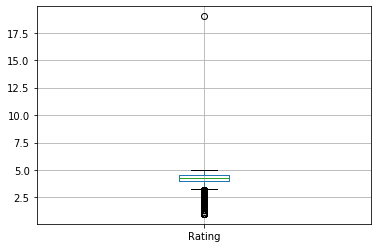

In [9]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f664c8ad518>]],
      dtype=object)

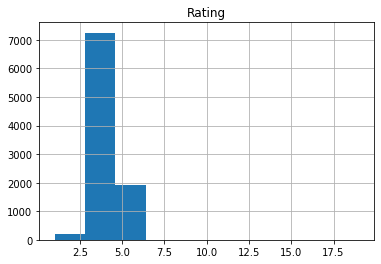

In [10]:
google_data.hist()

In [11]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Data Cleaning

#### Count the number of missing values in the Dataframe

In [12]:
google_data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# Count the number of missing values in each column
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Check how many ratings are more than 5 - Outliers

In [15]:
google_data[google_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [0]:
google_data.drop([10472],inplace=True)

In [17]:
google_data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


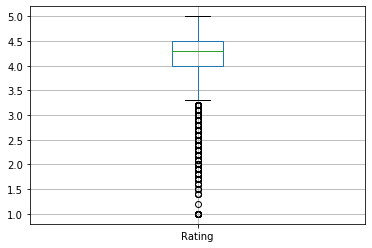

In [18]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f664c2e7ac8>]],
      dtype=object)

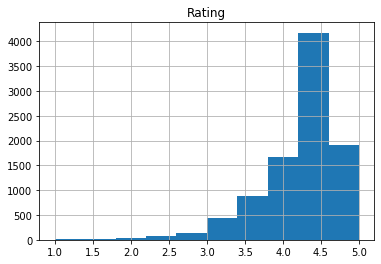

In [19]:
google_data.hist()

### Remove columns that are 90% empty

In [20]:
threshold = len(google_data)* 0.1
threshold

1084.0

In [0]:
google_data.dropna(thresh=threshold, axis=1, inplace=True)

In [22]:
print(google_data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


### Data Imputation and Manipulation

#### <span style="color:blue">Fill the  null values </span>with appropriate values using <span style="color:green">aggregate functions</span> such as <span style="color:red">mean, median or mode.</span>

In [0]:
#Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())

In [0]:
google_data.Rating = google_data['Rating'].transform(impute_median) 

In [25]:
#count the number of null values in each column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [26]:
# modes of categorical values
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [0]:
# Fill the missing categorical values with mode
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace=True)

In [28]:
#count the number of null values in each column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [0]:
### Let's convert Price, Reviews and Ratings into Numerical Values
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'], errors='coerce')

In [0]:
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

In [31]:
google_data.head(10) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [32]:
google_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


### Data Visualization

In [33]:
grp = google_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

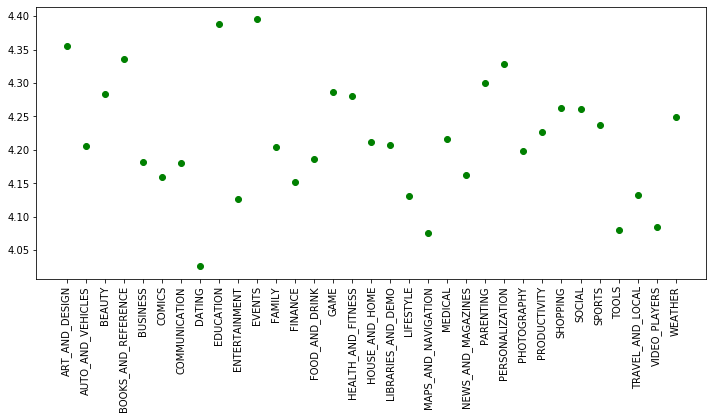

In [34]:
plt.figure(figsize=(12,5))
plt.plot(x, "ro", color='g')
plt.xticks(rotation=90)
plt.show()

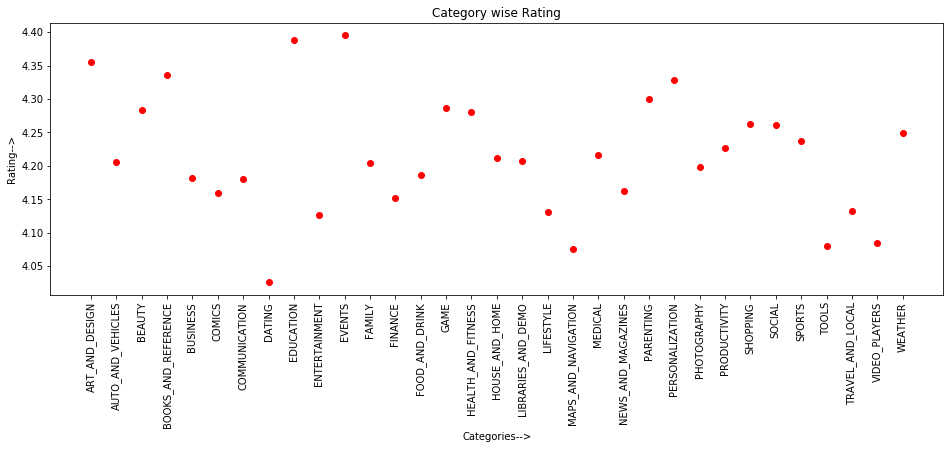

In [35]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

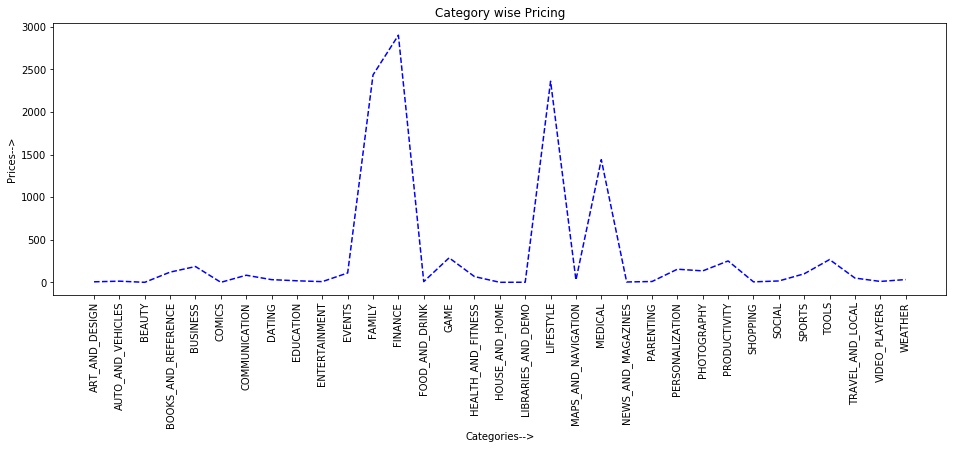

In [36]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

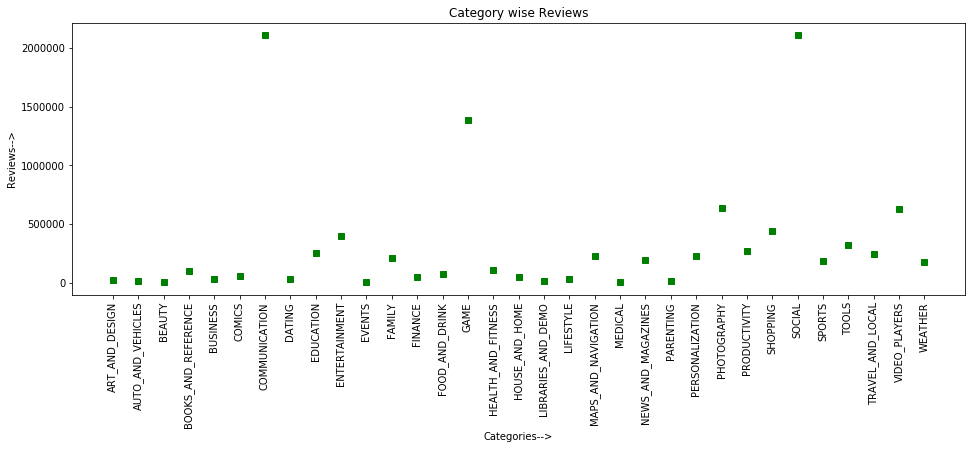

In [38]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()